In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

Importing plotly failed. Interactive plots will not work.


In [3]:
!pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22414 sha256=b4e169531132abee466190ac9659968cbeef11a77a8a68b06d7bc7bf9491712c
  Stored in directory: C:\Users\ADMINI~1\AppData\Local\Temp\pip-ephem-wheel-cache-n7tgcccz\wheels\f9\e3\5b\ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
  Created wheel for multitasking: filename=multitasking-0.0.9-cp37-none-any.whl size=8373 sha256=099f401823eb32a541e07b7066133c1639b472305e44e3e48917940d8b255644
  Stored in directory: C:\Users\ADMINI~1\AppData\Local\Temp\pip-ephem-wheel-cache-n7tgcccz\wheels\37\fa\73\d492849e319038eb4d986f5152e4b19ffb1bc0639da84d2677
Successfully built yfinance multitasking


In [6]:
# yahoo 사이트의 finance카테고리를 연결해서 주식 데이터를 얻을 수 있는 라이브러리
import yfinance as yf

# 데이터를 야후 등의 사이트에서 바로 받아올 수 있는 기능을 가진 라이브러리
from pandas_datareader import data

In [7]:
yf.pdr_override() # yahoo finace에 연결하기 위한 초기화 작업

In [15]:
start_date= '1990-1-1'
end_data='2020-7-20'

In [16]:
KIA =data.get_data_yahoo('035720.KS',start_date,end_data)

[*********************100%***********************]  1 of 1 completed


In [17]:
KIA

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-02-11,273000.0,273000.0,273000.0,273000.0,258278.734375,55300
2000-02-14,264000.0,298000.0,240500.0,247000.0,233680.750000,1254100
2000-02-15,250000.0,259000.0,217500.0,217500.0,205771.531250,648600
2000-02-16,210000.0,243500.0,200000.0,243500.0,230369.500000,871400
2000-02-17,246000.0,267500.0,235000.0,243500.0,230369.500000,1019800
...,...,...,...,...,...,...
2020-07-13,359000.0,361000.0,345000.0,352000.0,352000.000000,1391744
2020-07-14,340500.0,346500.0,340000.0,343000.0,343000.000000,1212519
2020-07-15,344000.0,349500.0,332000.0,337500.0,337500.000000,1487417


In [18]:
KIA.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-13,359000.0,361000.0,345000.0,352000.0,352000.0,1391744
2020-07-14,340500.0,346500.0,340000.0,343000.0,343000.0,1212519
2020-07-15,344000.0,349500.0,332000.0,337500.0,337500.0,1487417
2020-07-16,332000.0,335500.0,319000.0,322000.0,322000.0,1941508
2020-07-17,319000.0,327000.0,314000.0,325000.0,325000.0,1268587


<AxesSubplot:xlabel='Date'>

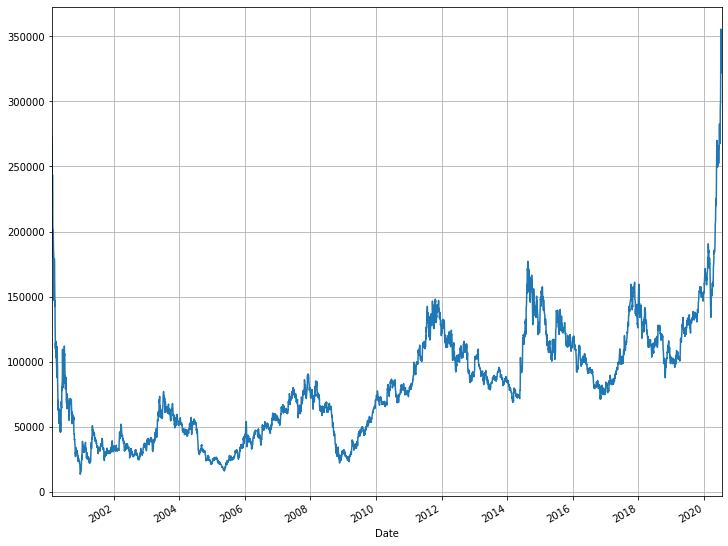

In [19]:
KIA['Close'].plot(figsize=(12,10), grid=True)

In [20]:
SAM =data.get_data_yahoo('005930.KS',start_date,end_data)
HY =data.get_data_yahoo('011760.KS',start_date,end_data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

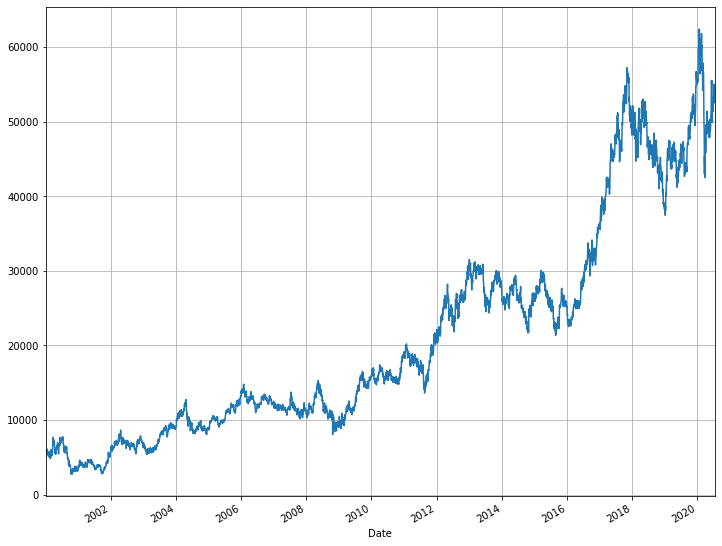

In [22]:
SAM['Close'].plot(figsize=(12,10), grid=True)


<AxesSubplot:xlabel='Date'>

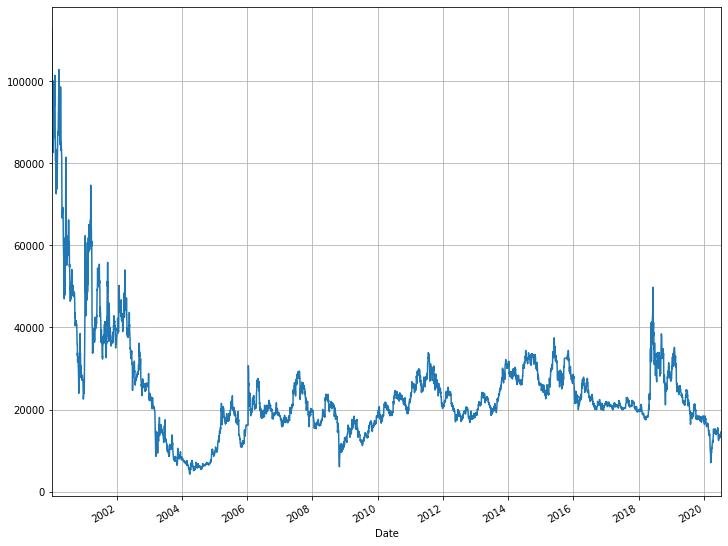

In [23]:
HY['Close'].plot(figsize=(12,10), grid=True)

In [ ]:
# facebook의 예측모델로 사용하려면, 2가지를 해야 한다.
# 날짜가 들어간 열이름을 ds로, 예측값이 들어간 열 이름을 y로 설정
# 데이터프레임을 만들어주어야 함

In [24]:
df = pd.DataFrame({
    'ds': KIA.index,
    'y': KIA['Close']
})

In [37]:
sam_df=pd.DataFrame({
    'ds':SAM.index,
    'y':SAM['Close']
})

In [50]:
hy_df=pd.DataFrame({
    'ds':HY.index,
    'y':HY['Close']
})

In [25]:
df

,ds,y
Date,,
2000-02-11,2000-02-11,273000.0
2000-02-14,2000-02-14,247000.0
2000-02-15,2000-02-15,217500.0
2000-02-16,2000-02-16,243500.0
2000-02-17,2000-02-17,243500.0
...,...,...
2020-07-13,2020-07-13,352000.0
2020-07-14,2020-07-14,343000.0
2020-07-15,2020-07-15,337500.0


In [27]:
df.reset_index(inplace=True)

In [28]:
del df['Date']

In [29]:
m= Prophet(daily_seasonality=True)

In [30]:
m.fit(df)

In [31]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
5080,2020-09-11
5081,2020-09-12
5082,2020-09-13
5083,2020-09-14
5084,2020-09-15


In [32]:
forecast = m.predict(future)

In [33]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-02-11,241704.907240,102854.164718,148815.051119,241704.907240,241704.907240,-115648.356798,-115648.356798,-115648.356798,-110002.406968,...,-5445.097453,-5445.097453,-5445.097453,-200.852376,-200.852376,-200.852376,0.0,0.0,0.0,126056.550441
1,2000-02-14,240744.288775,103396.139071,147899.075870,240744.288775,240744.288775,-115137.228610,-115137.228610,-115137.228610,-110002.406968,...,-5638.805183,-5638.805183,-5638.805183,503.983542,503.983542,503.983542,0.0,0.0,0.0,125607.060165
2,2000-02-15,240424.082620,101821.694099,147012.985777,240424.082620,240424.082620,-114836.805466,-114836.805466,-114836.805466,-110002.406968,...,-5544.301998,-5544.301998,-5544.301998,709.903500,709.903500,709.903500,0.0,0.0,0.0,125587.277153
3,2000-02-16,240103.876465,101713.320511,146765.079036,240103.876465,240103.876465,-114539.789412,-114539.789412,-114539.789412,-110002.406968,...,-5430.789550,-5430.789550,-5430.789550,893.407107,893.407107,893.407107,0.0,0.0,0.0,125564.087053
4,2000-02-17,239783.670310,103256.219869,147211.457634,239783.670310,239783.670310,-114393.475560,-114393.475560,-114393.475560,-110002.406968,...,-5441.607982,-5441.607982,-5441.607982,1050.539390,1050.539390,1050.539390,0.0,0.0,0.0,125390.194750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5080,2020-09-11,291395.358583,154409.660686,200903.663475,291395.358583,291395.358583,-113638.322168,-113638.322168,-113638.322168,-110002.406968,...,-5445.097453,-5445.097453,-5445.097453,1809.182254,1809.182254,1809.182254,0.0,0.0,0.0,177757.036415
5081,2020-09-12,291455.967660,174688.163375,219825.942297,291455.967660,291455.967660,-94323.809376,-94323.809376,-94323.809376,-110002.406968,...,13750.300381,13750.300381,13750.300381,1928.297211,1928.297211,1928.297211,0.0,0.0,0.0,197132.158284
5082,2020-09-13,291516.576736,173764.394321,219351.909858,291516.576736,291516.576736,-94194.996934,-94194.996934,-94194.996934,-110002.406968,...,13750.301786,13750.301786,13750.301786,2057.108249,2057.108249,2057.108249,0.0,0.0,0.0,197321.579802
5083,2020-09-14,291577.185813,153539.138579,200309.646537,291577.185813,291577.185813,-113449.883329,-113449.883329,-113449.883329,-110002.406968,...,-5638.805183,-5638.805183,-5638.805183,2191.328822,2191.328822,2191.328822,0.0,0.0,0.0,178127.302484


In [35]:
forecast[['ds', 'yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2000-02-11,126056.550441,102854.164718,148815.051119
1,2000-02-14,125607.060165,103396.139071,147899.075870
2,2000-02-15,125587.277153,101821.694099,147012.985777
3,2000-02-16,125564.087053,101713.320511,146765.079036
4,2000-02-17,125390.194750,103256.219869,147211.457634
...,...,...,...,...
5080,2020-09-11,177757.036415,154409.660686,200903.663475
5081,2020-09-12,197132.158284,174688.163375,219825.942297
5082,2020-09-13,197321.579802,173764.394321,219351.909858
5083,2020-09-14,178127.302484,153539.138579,200309.646537


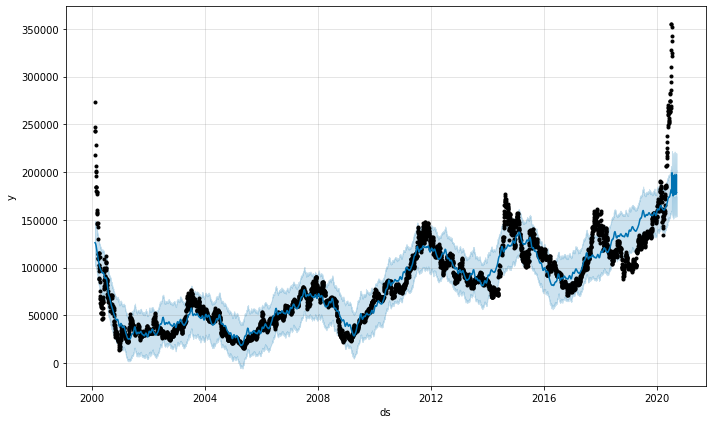

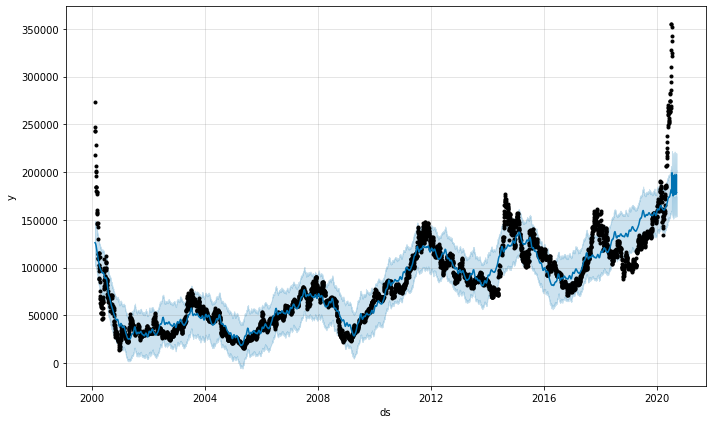

In [36]:
m.plot(forecast)

In [42]:
sam_df

,ds,y
0,2000-01-04,6110.0
1,2000-01-05,5580.0
2,2000-01-06,5620.0
3,2000-01-07,5540.0
4,2000-01-10,5770.0
...,...,...
5151,2020-07-13,53400.0
5152,2020-07-14,53800.0
5153,2020-07-15,54700.0
5154,2020-07-16,53800.0


In [39]:
sam_df.reset_index(inplace=True)

In [41]:
del sam_df['Date']

In [43]:
m2= Prophet(daily_seasonality=True)
m2.fit(sam_df)

In [44]:
future2 = m2.make_future_dataframe(periods=60)
future2.tail()

,ds
5211,2020-09-11
5212,2020-09-12
5213,2020-09-13
5214,2020-09-14
5215,2020-09-15


In [45]:
forecast2 = m2.predict(future2)

In [46]:
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-04,5982.193443,1606.424081,9612.331005,5982.193443,5982.193443,-365.870592,-365.870592,-365.870592,-279.680487,...,-7.041527,-7.041527,-7.041527,-79.148579,-79.148579,-79.148579,0.0,0.0,0.0,5616.322850
1,2000-01-05,5979.101686,2017.325244,9362.339606,5979.101686,5979.101686,-338.855578,-338.855578,-338.855578,-279.680487,...,-1.618894,-1.618894,-1.618894,-57.556197,-57.556197,-57.556197,0.0,0.0,0.0,5640.246109
2,2000-01-06,5976.009930,1851.617256,9769.996504,5976.009930,5976.009930,-304.900687,-304.900687,-304.900687,-279.680487,...,7.275128,7.275128,7.275128,-32.495328,-32.495328,-32.495328,0.0,0.0,0.0,5671.109243
3,2000-01-07,5972.918173,2235.666966,9499.981795,5972.918173,5972.918173,-316.591208,-316.591208,-316.591208,-279.680487,...,-32.598602,-32.598602,-32.598602,-4.312120,-4.312120,-4.312120,0.0,0.0,0.0,5656.326965
4,2000-01-10,5963.642904,1989.414573,9597.222591,5963.642904,5963.642904,-220.985029,-220.985029,-220.985029,-279.680487,...,-35.936200,-35.936200,-35.936200,94.631658,94.631658,94.631658,0.0,0.0,0.0,5742.657876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211,2020-09-11,56641.264477,52129.926679,59963.812087,56641.264477,56641.264477,-627.444377,-627.444377,-627.444377,-279.680487,...,-32.598602,-32.598602,-32.598602,-315.165288,-315.165288,-315.165288,0.0,0.0,0.0,56013.820100
5212,2020-09-12,56655.986918,52170.097549,60294.401928,56655.986918,56655.986918,-546.029430,-546.029430,-546.029430,-279.680487,...,34.960041,34.960041,34.960041,-301.308984,-301.308984,-301.308984,0.0,0.0,0.0,56109.957488
5213,2020-09-13,56670.709358,52416.291081,59825.447694,56670.709358,56670.709358,-534.055111,-534.055111,-534.055111,-279.680487,...,34.960053,34.960053,34.960053,-289.334677,-289.334677,-289.334677,0.0,0.0,0.0,56136.654247
5214,2020-09-14,56685.431798,52503.007069,59751.353301,56685.431798,56685.431798,-595.051416,-595.051416,-595.051416,-279.680487,...,-35.936200,-35.936200,-35.936200,-279.434729,-279.434729,-279.434729,0.0,0.0,0.0,56090.380382


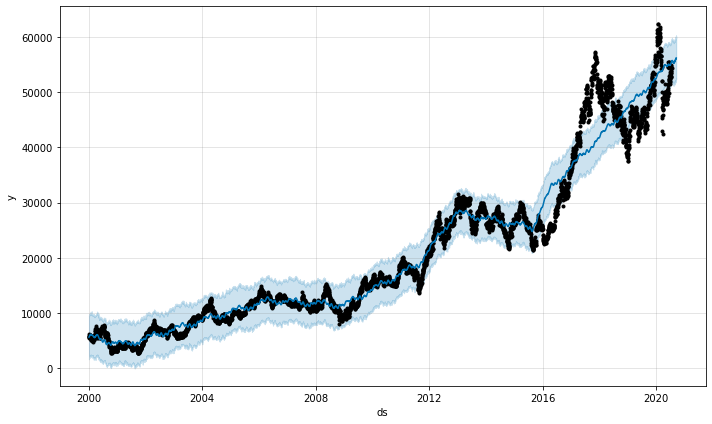

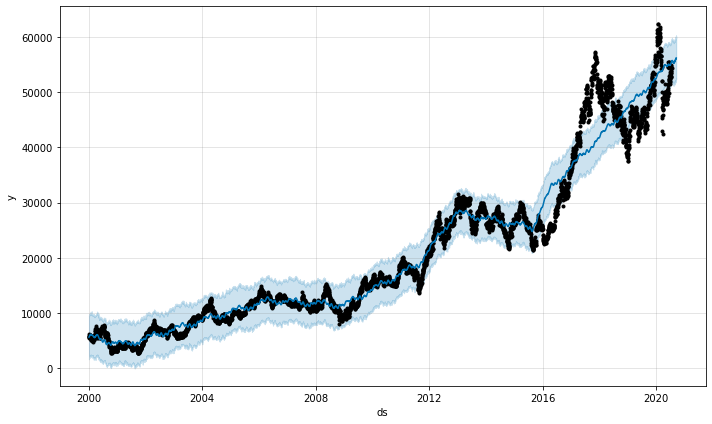

In [49]:
m2.plot(forecast2)

In [48]:
SAM

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,0.090599,74195000
2000-01-05,5800.0,6060.0,5520.0,5580.0,0.082740,74680000
2000-01-06,5750.0,5780.0,5580.0,5620.0,0.083333,54390000
2000-01-07,5560.0,5670.0,5360.0,5540.0,0.082147,40305000
2000-01-10,5600.0,5770.0,5580.0,5770.0,0.085558,46880000
...,...,...,...,...,...,...
2020-07-13,53300.0,53800.0,53100.0,53400.0,53400.000000,12240188
2020-07-14,53700.0,53800.0,53200.0,53800.0,53800.000000,14269484
2020-07-15,54400.0,55000.0,54300.0,54700.0,54700.000000,24051450


In [51]:
hy_df

,ds,y
Date,,
2000-01-04,2000-01-04,112726.0
2000-01-05,2000-01-05,106855.0
2000-01-06,2000-01-06,104741.0
2000-01-07,2000-01-07,102862.0
2000-01-10,2000-01-10,100396.0
...,...,...
2020-07-13,2020-07-13,14400.0
2020-07-14,2020-07-14,14300.0
2020-07-15,2020-07-15,14600.0


In [52]:
hy_df.reset_index(inplace=True)
del hy_df['Date']

In [53]:
hy_df

,ds,y
0,2000-01-04,112726.0
1,2000-01-05,106855.0
2,2000-01-06,104741.0
3,2000-01-07,102862.0
4,2000-01-10,100396.0
...,...,...
5125,2020-07-13,14400.0
5126,2020-07-14,14300.0
5127,2020-07-15,14600.0
5128,2020-07-16,14700.0


In [54]:
m3= Prophet(daily_seasonality=True)
m3.fit(hy_df)
future3 = m3.make_future_dataframe(periods=60)
future3.tail()
forecast3 = m3.predict(future3)

In [56]:
forecast3

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-04,107736.210193,89517.276230,100770.094617,107736.210193,107736.210193,-12834.509277,-12834.509277,-12834.509277,-11350.096932,...,-613.576219,-613.576219,-613.576219,-870.836125,-870.836125,-870.836125,0.0,0.0,0.0,94901.700917
1,2000-01-05,107520.652357,88488.314599,100361.430846,107520.652357,107520.652357,-12740.152901,-12740.152901,-12740.152901,-11350.096932,...,-632.331535,-632.331535,-632.331535,-757.724433,-757.724433,-757.724433,0.0,0.0,0.0,94780.499457
2,2000-01-06,107305.094521,88597.296464,100682.186454,107305.094521,107305.094521,-12517.508753,-12517.508753,-12517.508753,-11350.096932,...,-519.157257,-519.157257,-519.157257,-648.254564,-648.254564,-648.254564,0.0,0.0,0.0,94787.585768
3,2000-01-07,107089.536685,88733.838755,100475.825485,107089.536685,107089.536685,-12420.343022,-12420.343022,-12420.343022,-11350.096932,...,-526.534546,-526.534546,-526.534546,-543.711543,-543.711543,-543.711543,0.0,0.0,0.0,94669.193663
4,2000-01-10,106442.863177,88646.751310,99959.858266,106442.863177,106442.863177,-12165.857901,-12165.857901,-12165.857901,-11350.096932,...,-545.924511,-545.924511,-545.924511,-269.836458,-269.836458,-269.836458,0.0,0.0,0.0,94277.005276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,2020-09-11,30918.164263,13804.491436,25623.468907,30918.164263,30918.164263,-10947.037109,-10947.037109,-10947.037109,-11350.096932,...,-526.534546,-526.534546,-526.534546,929.594370,929.594370,929.594370,0.0,0.0,0.0,19971.127155
5186,2020-09-12,30914.177098,15556.408529,27768.027930,30914.177098,30914.177098,-8940.846598,-8940.846598,-8940.846598,-11350.096932,...,1418.761723,1418.761723,1418.761723,990.488611,990.488611,990.488611,0.0,0.0,0.0,21973.330500
5187,2020-09-13,30910.189932,16140.064337,28156.559350,30910.189932,30910.189932,-8884.417011,-8884.417011,-8884.417011,-11350.096932,...,1418.762344,1418.762344,1418.762344,1046.917577,1046.917577,1046.917577,0.0,0.0,0.0,22025.772921
5188,2020-09-14,30906.202766,14611.823632,26214.810481,30906.202766,30906.202766,-10798.599978,-10798.599978,-10798.599978,-11350.096932,...,-545.924511,-545.924511,-545.924511,1097.421465,1097.421465,1097.421465,0.0,0.0,0.0,20107.602788


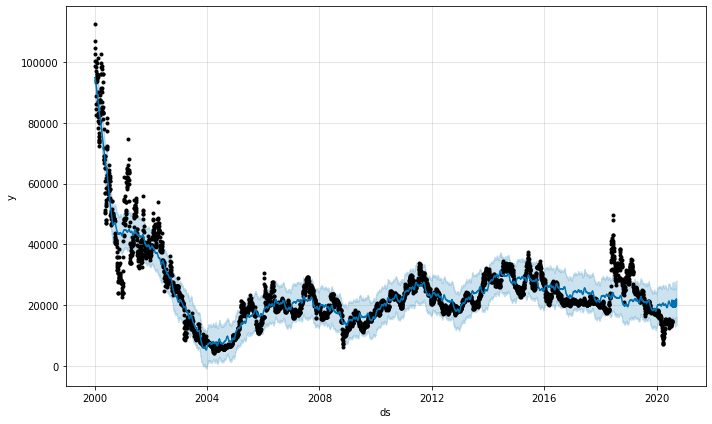

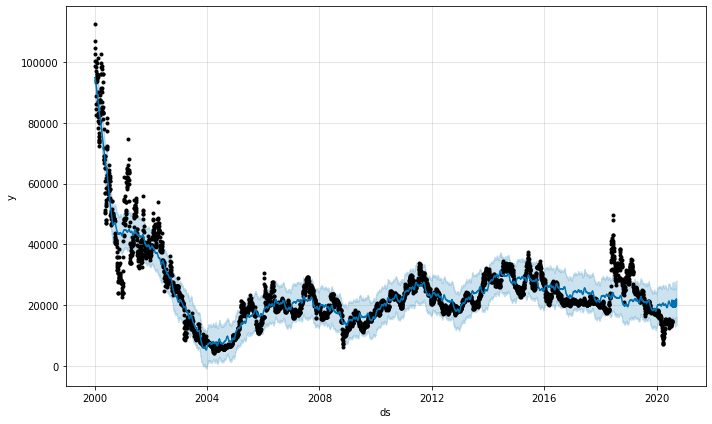

In [58]:
m3.plot(forecast3)

In [59]:
naver =data.get_data_yahoo('035420.KS',start_date,end_data)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

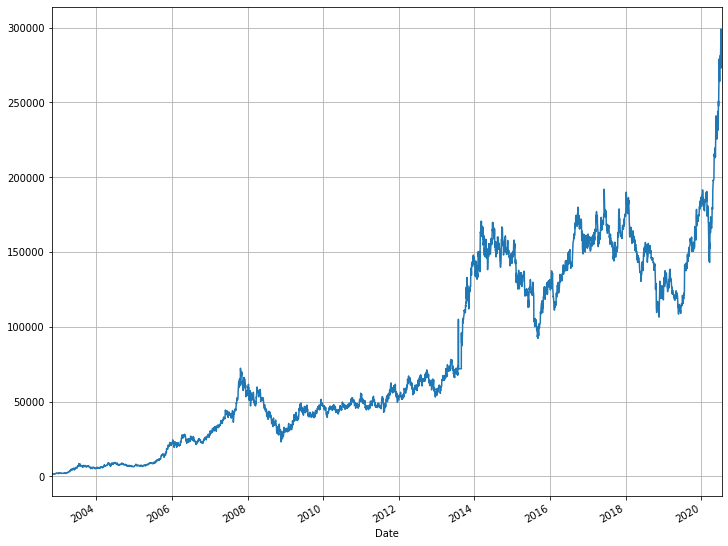

In [60]:
naver['Close'].plot(figsize=(12,10), grid=True)

In [61]:
na_df = pd.DataFrame({
    'ds': naver.index,
    'y': naver['Close']
})

In [62]:
na_df.reset_index(inplace=True)
del na_df['Date']

In [63]:
m4= Prophet(daily_seasonality=True)
m4.fit(na_df)
future4 = m4.make_future_dataframe(periods=60)
future4.tail()
forecast4 = m4.predict(future4)

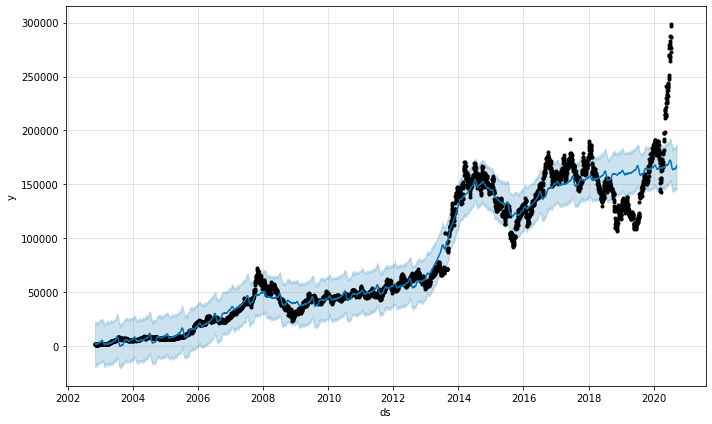

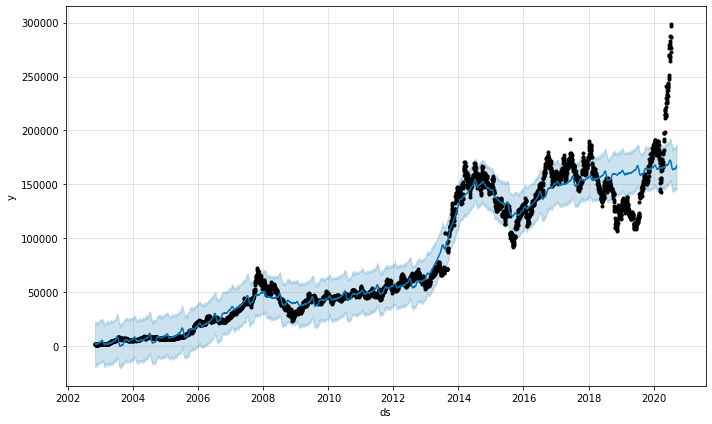

In [64]:
m4.plot(forecast4)

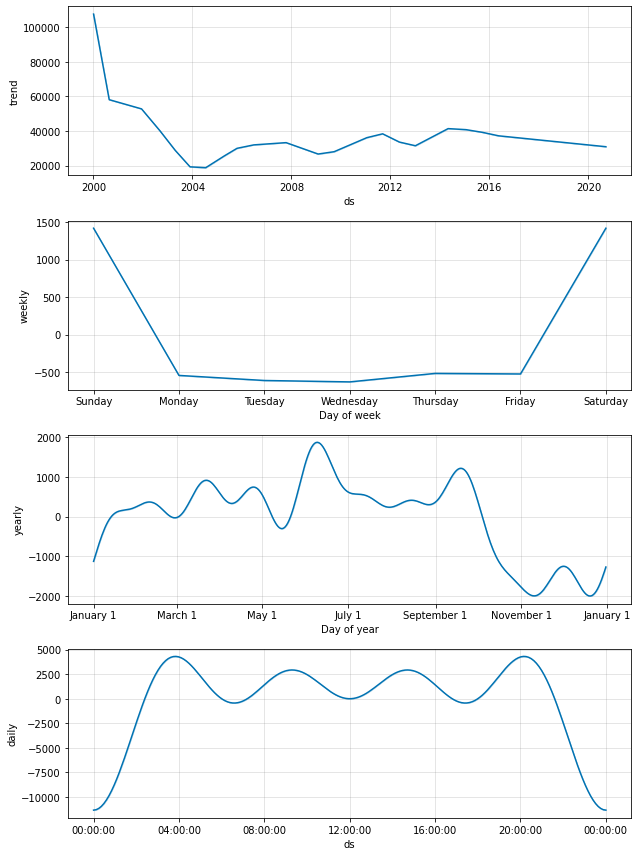

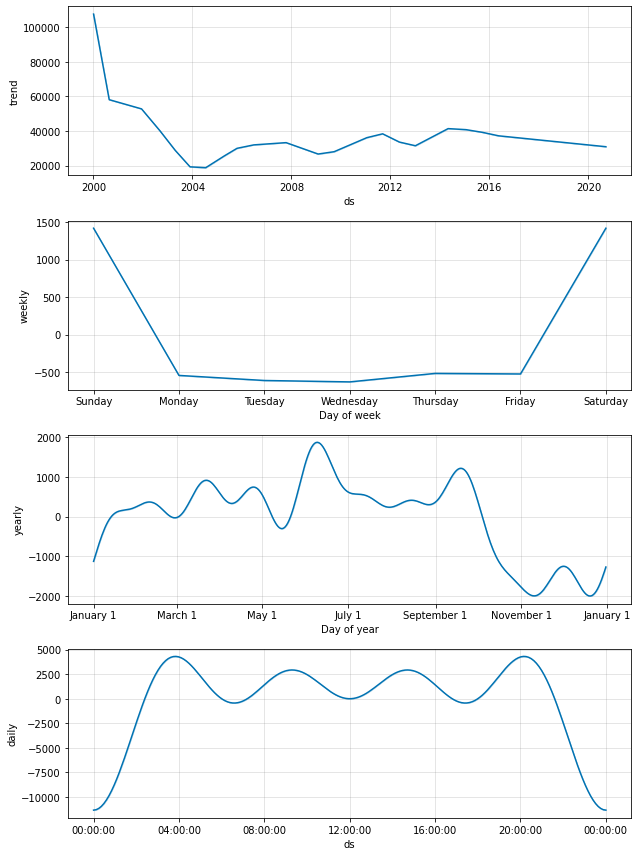

In [65]:
m3.plot_components(forecast3)